In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
np.set_printoptions(threshold=np.nan)

The equation of the Non-conservative form of shallow water equation is:

\begin{align}
\frac{\partial h}{\partial t} + H \left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right) = 0 \\
\frac{\partial u}{\partial t} - f v = -g \frac{\partial h}{\partial x} - b u \\
\frac{\partial v}{\partial t} + f u = -g \frac{\partial h}{\partial y} - b v \\
\end{align}

which is a coupled system of PDEs.

We can reorganize these equations:

\begin{align}
\frac{\partial h}{\partial t} + H \left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right) = 0 \\
\frac{\partial u}{\partial t} + g \frac{\partial h}{\partial x} + b u - f v = 0 \\
\frac{\partial v}{\partial t} + g \frac{\partial h}{\partial y} + b v + f u = 0 \\
\end{align}

where,

$u$:    is the velocity in the x direction, or zonal velocity <br/>
$v$:	is the velocity in the y direction, or meridional velocity <br/>
$h$:	is the height deviation of the horizontal pressure surface from its mean height H: η = H + h <br/>
$H$:	is the mean height of the horizontal pressure surface <br/>
$g$:	is the acceleration due to gravity <br/>
$f$:	is the Coriolis coefficient associated with the Coriolis force, on Earth equal to 2Ω sin(φ), where Ω is the           angular rotation rate of the Earth (π/12 radians/hour), and φ is the latitude <br/>
$b$:	is the viscous drag coefficient <br/>
$ν$:	is the kinematic viscosity <br/>

We can vectorized these three equations:

\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
 h \\
 u \\
 v \\ 
\end{array} \right]
+ 
\frac{\partial}{\partial x}
\left[ \begin{array}{c}
 Hu \\
 gh \\
 0 \\ \end{array}
\right]
+
\frac{\partial}{\partial y}
\left[ \begin{array}{c}
 Hv \\
 0 \\
 gh \\ \end{array}
\right]
+
\left[ \begin{array}{c}
 0 \\
 bu - fv \\
 bv + fu \\ \end{array}
\right]
=0
\end{equation}

Set the variables $\underline{\mathbf{h}}$ for the equations are:

\begin{equation}\underline{\mathbf{h}} = \left[ \begin{array}{c}
 h \\
 u \\
 v \\ 
\end{array} \right]\end{equation}

Similarily,
\begin{equation}\underline{\mathbf{u}} = \left[ \begin{array}{c}
 Hu \\
 gh \\
 0 \\
\end{array} \right]\end{equation}

\begin{equation}\underline{\mathbf{v}} = \left[ \begin{array}{c}
 Hv \\
 0 \\
 gh \\
\end{array} \right]\end{equation}

\begin{equation}\underline{\mathbf{b}} = \left[ \begin{array}{c}
 0 \\
 bu - fv \\
 bv + fu \\
\end{array} \right]\end{equation}

Now, the system of equations can be written as:

\begin{align}
\frac{\partial}{\partial t}\underline{\mathbf{h}} + \frac{\partial}{\partial x}\underline{\mathbf{u}} + 
\frac{\partial}{\partial y}\underline{\mathbf{v}} + \underline{\mathbf{b}} = 0 \\
\end{align}

Then write this out discretized using forward difference in time, and central difference in space, using an explicit scheme.

\begin{equation}
\frac{\underline{\mathbf{h}}^{n+1}_{i,j} - \underline{\mathbf{h}}^n_{i,j}}{\Delta t} = - \left( \frac{\underline{\mathbf{u}}^n_{i+1, j} -  \underline{\mathbf{u}}^n_{i-1,j}}{2\Delta x} + \frac{\underline{\mathbf{v}}^n_{i, j+1} - \underline{\mathbf{v}}^n_{i,j-1}}{2\Delta y} + 
\underline{\mathbf{b}} \right)
\end{equation}

Rearranging the equation to solve for the value at the next time step, $\underline{\mathbf{h}}^{n+1}_{i,j}$, yields

\begin{equation}
\underline{\mathbf{h}}^{n+1}_{i,j} = \underline{\mathbf{h}}^n_{i,j} - \Delta t\left( \frac{\underline{\mathbf{u}}^n_{i+1, j} - \underline{\mathbf{u}}^n_{i-1,j}}{2\Delta x} + \frac{\underline{\mathbf{v}}^n_{i, j+1} - \underline{\mathbf{v}}^n_{i,j-1}}{2\Delta y} + 
\underline{\mathbf{b}} \right)
\end{equation}

\begin{equation}
\underline{\mathbf{h}}x^{n+1/2}_{i+1/2,j}  = \frac{1}{2}(\underline{\mathbf{h}}^n_{i+1,j} + \underline{\mathbf{h}}^n_{i,j}) + 
\frac{\Delta t}{2\Delta x}(\underline{\mathbf{u}}^n_{i+1, j} - \underline{\mathbf{u}}^n_{i,j}) \\
\underline{\mathbf{h}}x^{n+1/2}_{i,j+1/2}  = \frac{1}{2}(\underline{\mathbf{h}}^n_{i,j+1} + \underline{\mathbf{h}}^n_{i,j}) + 
\frac{\Delta t}{2\Delta y}(\underline{\mathbf{v}}^n_{i, j+1} - \underline{\mathbf{v}}^n_{i,j}) \\
\end{equation}

By using the Lax-Wendroff method, the equation can be rewritted as:
\begin{equation}
\underline{\mathbf{h}}^{n+1}_{i,j} = \underline{\mathbf{h}}^n_{i,j} - \Delta t\left( \frac{\underline{\mathbf{u}}^{n+1/2}_{i+1/2, j} - \underline{\mathbf{u}}^{n+1/2}_{i-1/2,j}}{\Delta x} + \frac{\underline{\mathbf{v}}^{n+1/2}_{i, j+1/2} - \underline{\mathbf{v}}^{n+1/2}_{i,j-1/2}}{\Delta y} + 
\underline{\mathbf{b}} \right)
\end{equation}

In [3]:
# Initial Conditions
n = 100
u0 = np.zeros((n,n)) # velocity in x direction - still water
v0 = np.zeros((n,n)) # velocity in y direction - still water

# eta (like height) will be uniform with a perturbation in the center
eta_start = np.ones((n,n)) # pressure deviation (like height)
x,y = np.mgrid[:n,:n]
droplet_x, droplet_y = n/2, n/2
rr = (x-droplet_x)**2 + (y-droplet_y)**2
eta_start[rr<10**2] = 1.1 # add a perturbation in pressure surface


# Parameters describing simulation
box_size = 1.
dx = box_size / n
dy = box_size / n
g = 1. # Gravity
sigma = .01
dt = sigma*dx
# dt = dx / 100.
t = 1
nt = int(t/dt) + 1


x = np.linspace(0, 99, n)
y = np.linspace(0, 99, n)

In [4]:
def computeH(n, eta_start):
    
    h = eta_start
    
    u = np.zeros((n,n))
    
    v = np.zeros((n,n))
    
    return np.array([h, u, v])

def computeU(H):
    
    
    U1 = H[1]
    
    U2 = g*H[0]
    
    U3 = np.zeros((n,n))
    
    return np.array([U1, U2, U3])

def computeV(H):
    
    V1 = H[2]
    
    V2 = np.zeros((n,n))
    
    V3 = g*H[0]
    
    return np.array([V1, V2, V3])

def computeB(H):
    
    b = 1
    
    B1 = np.zeros((n,n))
    
    B2 = b*H[1]
    
    B3 = b*H[2]
    
    return np.array([B1, B2, B3])

In [5]:
# def ftcs(H, nt, n, dt, dx, dy):
#     H_n = np.zeros((3, nt, n, n))

#     for t in range(0, nt):
#         H_n[:,t,:,:] = H[:,:,:]

#     for t in range(1,nt):
#         U = computeU(H)
#         V = computeV(H)
#         B = computeB(H)
#         H_n[:,t,1:-1,1:-1] = H[:,1:-1,1:-1] - dt*( (U[:,2:,1:-1] - U[:,:-2,1:-1])/(2*dx) + \
#                                                   (V[:,1:-1,2:] - V[:,1:-1,:-2])/(2*dy) + B[:,1:-1,1:-1])
        
        
#         H_n[0,t,:,0] = H_n[0,t,:,1]
#         H_n[0,t,:,-1] = H_n[0,t,:,-2]
#         H_n[0,t,0,:] = H_n[0,t,1,:]
#         H_n[0,t,-1,:] = H_n[0,t,-2,:]
        
#         H = H_n[:,t,:,:].copy()
        
#     return H_n


In [6]:
def ftcs(H, nt, n, dt, dx, dy):
    H_n = np.zeros((nt, 3, n, n))

    for t in range(0, nt):
        H_n[t] = H

    for t in range(1,nt):
        U = computeU(H)
        V = computeV(H)
        B = computeB(H)
        H_n[t,:,1:-1,1:-1] = H[:,1:-1,1:-1] - dt*( (U[:,2:,1:-1] - U[:,:-2,1:-1])/(2*dx) + \
                                                  (V[:,1:-1,2:] - V[:,1:-1,:-2])/(2*dy) + B[:,1:-1,1:-1])
        
        
        H_n[t,0,:,0] = H_n[t,0,:,1]
        H_n[t,0,:,-1] = H_n[t,0,:,-2]
        H_n[t,0,0,:] = H_n[t,0,1,:]
        H_n[t,0,-1,:] = H_n[t,0,-2,:]
        
        H = H_n[t].copy()
        
    return H_n

In [7]:
H = computeH(n, eta_start)

H_n = ftcs(H, nt, n, dt, dx, dy)

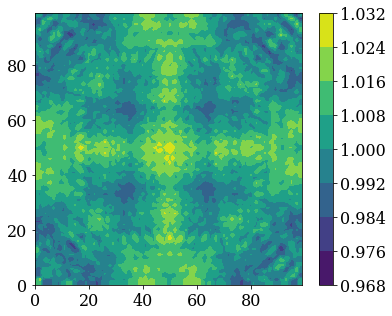

In [8]:
pyplot.figure(figsize=(6,5))
pyplot.contourf(x,y,H_n[-1,0,:,:])
pyplot.colorbar();

In [9]:
from matplotlib import animation
from IPython.display import HTML
from JSAnimation import IPython_display

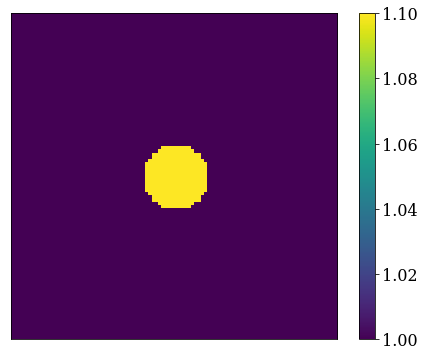

In [10]:
fig = pyplot.figure(figsize=(8,6));
pyplot.xticks([]), pyplot.yticks([]);
image = pyplot.imshow(H[0])
pyplot.colorbar();

In [11]:
def animate(data):
    image.set_data(data)
    return image,

In [12]:
anim = animation.FuncAnimation(fig, animate, frames=H_n[:,0], interval=0.5)

In [13]:
HTML(anim.to_html5_video())

In [20]:
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=100, metadata=dict(artist='Me'))
# anim.save('anim.mp4', writer=writer)

In [19]:
!brew install imagemagick

Error: Your Xcode (8.1) is too outdated.
Please update to Xcode 9.1 (or delete it).
Xcode can be updated from the App Store.



In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [21]:
def plot_3D(x, y, p):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(8,6), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

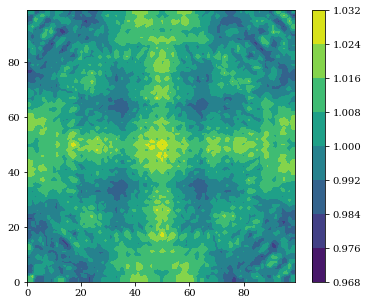

In [35]:
pyplot.figure(figsize=(6,5))
pyplot.contourf(x,y,H_n[-1,0,:,:])
pyplot.colorbar();

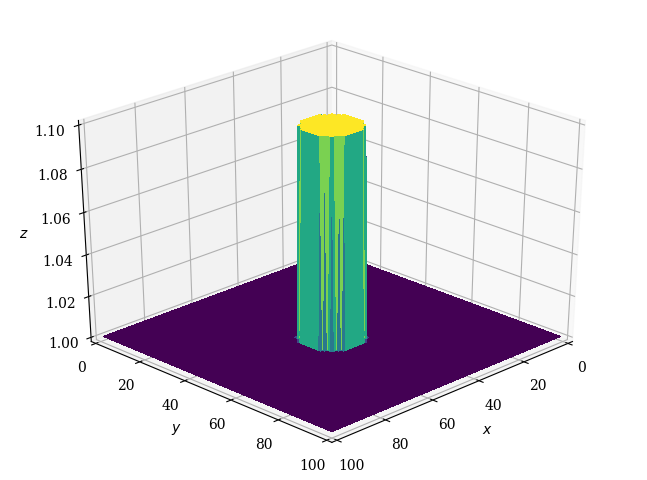

In [23]:
plot_3D(x,y,H_n[0,0,:,:])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from JSAnimation import IPython_display
from matplotlib import animation

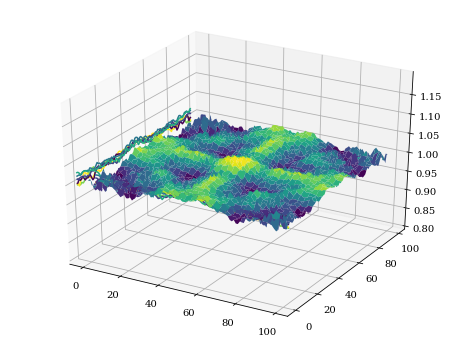

In [34]:
h = H_n[:,0,:,:]

X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

ax.plot_surface(X,Y,h[-1], rstride=3, cstride=3,\
                       cmap=cm.viridis, antialiased=True, linewidth=0)
ax.contour(X,Y,h[-1], zdir='z', offset=-1, cmap=cm.viridis)
ax.contour(X,Y,h[-1], zdir='x', offset=-6, cmap=cm.viridis)
ax.contour(X,Y,h[-1], zdir='y', offset=6, cmap=cm.viridis)
ax.set_zlim(0.8,1.2);


In [116]:
def animate(data):
    ax.clear()
    ax.set_zlim(0,1.2)
    ax.plot_surface(X,Y,data, rstride=3, cstride=3,\
                       cmap=cm.viridis, antialiased=True, linewidth=0)
    ax.contour(X,Y,data, zdir='z', offset=-1, cmap=cm.viridis)
    ax.contour(X,Y,data, zdir='x', offset=-6, cmap=cm.viridis)
    ax.contour(X,Y,data, zdir='y', offset=6, cmap=cm.viridis)
    return ax

In [117]:
ani = animation.FuncAnimation(fig, animate, frames=h, interval=1, blit=False)

HTML(ani.to_html5_video())

In [61]:
ani = animation.FuncAnimation(fig, animate, frames=h, interval=1, blit=False)

HTML(ani.to_html5_video())

In [15]:
whos

Variable          Type             Data/Info
--------------------------------------------
H                 ndarray          3x100x100: 30000 elems, type `float64`, 240000 bytes (234.375 kb)
HTML              type             <class 'IPython.core.display.HTML'>
H_n               ndarray          10001x3x100x100: 300030000 elems, type `float64`, 2400240000 bytes (2289.0472412109375 Mb)
IPython_display   module           <module 'JSAnimation.IPyt<...>tion/IPython_display.py'>
Writer            ABCMeta          <class 'matplotlib.animation.FFMpegWriter'>
anim              FuncAnimation    <matplotlib.animation.Fun<...>on object at 0x114c7fef0>
animate           function         <function animate at 0x114cda1e0>
animation         module           <module 'matplotlib.anima<...>matplotlib/animation.py'>
box_size          float            1.0
cm                module           <module 'matplotlib.cm' f<...>ckages/matplotlib/cm.py'>
computeB          function         <function computeB at 0x11